# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.


## Import Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Classified Data.unknown", index_col = 0)

In [3]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
#create a DAtaFrame
df =pd.DataFrame(data).set_index('WTT')

In [31]:
#seperate features and target
X = df.drop('TARGET CLASS', axis =1)  #features
y = df['TARGET CLASS']    #target variable

In [33]:
#initilise the StandardScaler
scaler = StandardScaler(copy = True, with_mean =True, with_std =True)

In [35]:
# Fit the scaler on the features and transform them
X_standardized = scaler.fit_transform(X)

In [37]:
#convert back to Dataframe for better readability
X_standardized_df = pd.DataFrame(X_standardized, columns =X.columns)

In [39]:
#Display the standardized features
print(X_standardized_df)

          PTI       EQW       SBI       LQE       QWG       FDJ       PJF  \
0    0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951 -1.482368   
1   -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797 -0.202240   
2    0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818  0.285707   
3    1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208  1.066491   
4   -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782 -1.472352   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.312490  0.065163 -0.259834  0.017567 -1.395721 -0.849486 -2.604264   
996 -0.616901  0.369613  0.482648  1.569891  1.273495  0.362784 -1.242110   
997 -0.513083 -0.179205  1.022255 -0.539703 -0.229680 -2.261339 -2.362494   
998 -0.982786 -1.465194 -0.071465  2.368666  0.001269 -0.422041 -0.036777   
999 -0.595894 -1.431398  0.512722 -0.402552 -2.026512 -0.726253 -0.567789   

          HQE       NXJ  
0   -0.949719 -0.643314  
1   -1.828051  0.636759

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
predictions = knn.predict(X_test)

## Predictions and Evaluations

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
confusion_matrix(y_test, predictions)

array([[145,  14],
       [ 15, 126]], dtype=int64)

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       159
           1       0.90      0.89      0.90       141

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## Choosing a K Value


In [63]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors =i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



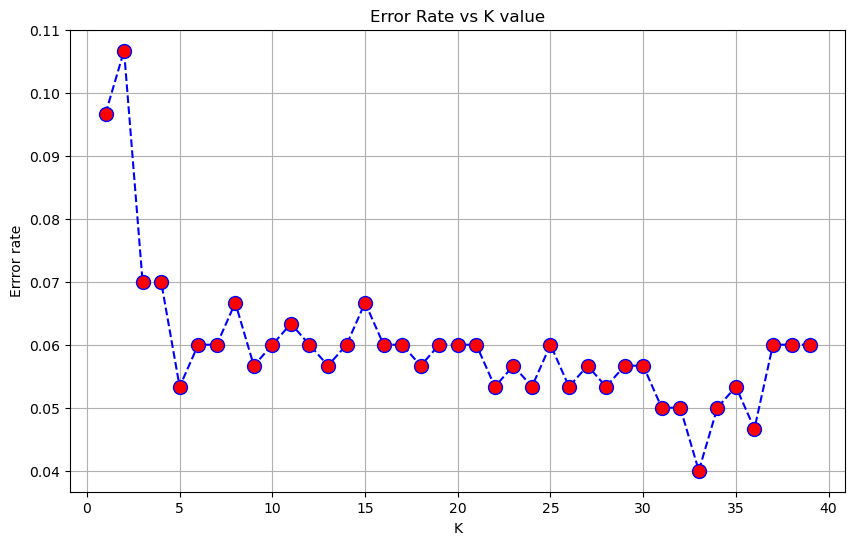

In [65]:

plt.figure(figsize =(10,6))
plt.plot(range(1,40), error_rate, color ='blue', linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize =10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Errror rate')
plt.grid()

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!



In [68]:
#comparing new result to k =1
#with k = 1

knn =KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


In [70]:
confusion_matrix(y_test,predictions)

array([[145,  14],
       [ 15, 126]], dtype=int64)

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       159
           1       0.90      0.89      0.90       141

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# END
